<a href="https://colab.research.google.com/github/dynasty-29/Kaggle-BIPOC-Program-Projects/blob/main/Amazon_Reviews_Classification_A_Random_Forest_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Random forest is a popular machine learning algorithm that belongs to the ensemble learning family. It is a type of supervised learning algorithm that can be used for both classification and regression tasks.

The main idea behind the random forest algorithm is to combine the predictions of multiple decision trees, which are trained on different subsets of the data, to improve the overall predictive performance. This is achieved by training a large number of decision trees, each of which is trained on a randomly selected subset of the training data. The final prediction is made by aggregating the predictions of all the individual trees, typically using a majority vote for classification tasks or averaging for regression tasks.

One of the key advantages of the random forest algorithm is that it is relatively simple to implement and can often achieve good predictive performance with little fine-tuning. It is also resistant to overfitting, which means that it generally performs well on unseen data.

Some of the key hyperparameters for the random forest algorithm include the number of decision trees to include in the ensemble, the maximum depth of the trees, and the number of features to consider when splitting each node in the tree. These hyperparameters can be tuned through cross-validation or other methods to optimize the performance of the model.

Amazon Alexa, also known simply as Alexa, is a virtual assistant technology developed by Amazon, first used in the Amazon Echo smart speaker and the Echo Dot, Echo Studio and Amazon Tap speakers developed by Amazon Lab126. It is capable of voice interaction, music playback, making to-do lists, setting alarms, streaming podcasts, playing audiobooks, and providing weather, traffic, sports, and other real-time information, such as news. Alexa can also control several smart devices using itself as a home automation system. Users are able to extend the Alexa capabilities by installing "skills" (additional functionality developed by third-party vendors, in other settings more commonly called apps) such as weather programs and audio features. It uses NLU (natural language understanding), speech recognition and other weak AI to perform these tasks. The data was obtained from [Kaggle](https://www.kaggle.com/code/ilkeryildiz/random-forest-for-amazon-reviews-classification/data).

In [1]:

#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data set
df = pd.read_csv("/content/amazon_alexa.tsv", sep="\t")

In [3]:
#previewing the data set
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
#Checking the shape
df.shape

(3150, 5)

In [5]:
#Checking for null
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [6]:
#checking value count for variation column
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

we have 16 variations

In [7]:
# grouping by rating to check the highest rated variation 
df.groupby('variation').agg({"rating":"mean"}).sort_values('rating', ascending = False)

,rating
variation,
Walnut Finish,4.888889
Oak Finish,4.857143
Charcoal Fabric,4.730233
Heather Gray Fabric,4.694268
Configuration: Fire TV Stick,4.591429
Black Show,4.490566
Black Dot,4.453488
White Dot,4.423913
Black Plus,4.370370


Walnut is the top rated variation while white is the least

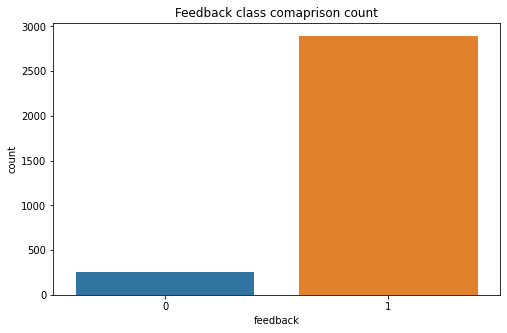

In [8]:
#Previewing feedback class count
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(df['feedback'], label = "Count", ax=ax).set(
    title="Feedback class comaprison count") 
plt.show()

Most of the customers gave positive (1) feedback to products ordered.

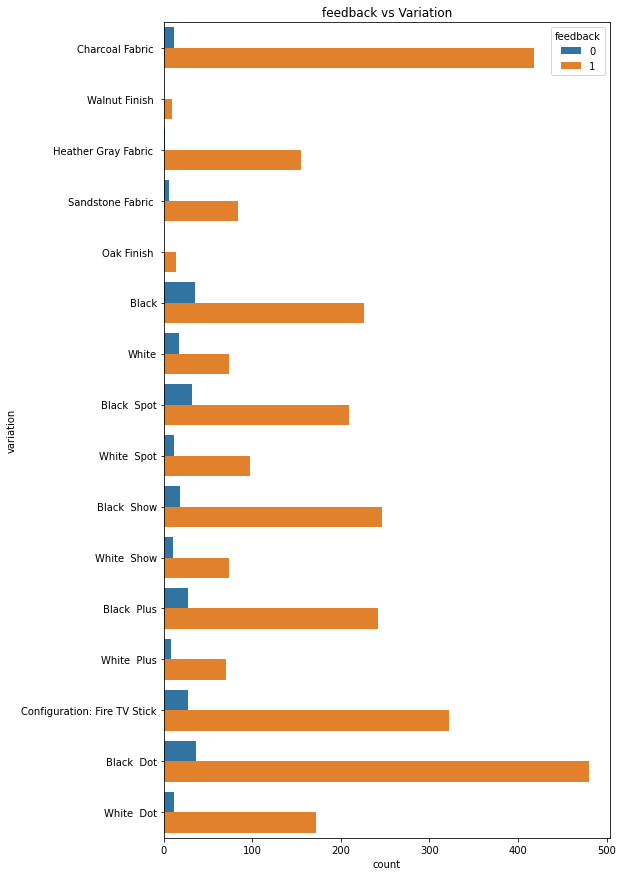

In [9]:
#comparing variation with feedback received either positive or negative
fig, ax = plt.subplots(figsize=(8,15))
sns.countplot(data=df, y="variation", hue="feedback",  ax=ax).set(
    title="feedback vs Variation") 
plt.show()
     

In [10]:
#checking value count for rating column
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [11]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [12]:
# our aim is to classify review depending on feedbak so we don't need date and rating column
df.drop(columns=['rating', 'date'], inplace=True, axis=1)
df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


**Doing a wordcloud for reviews**

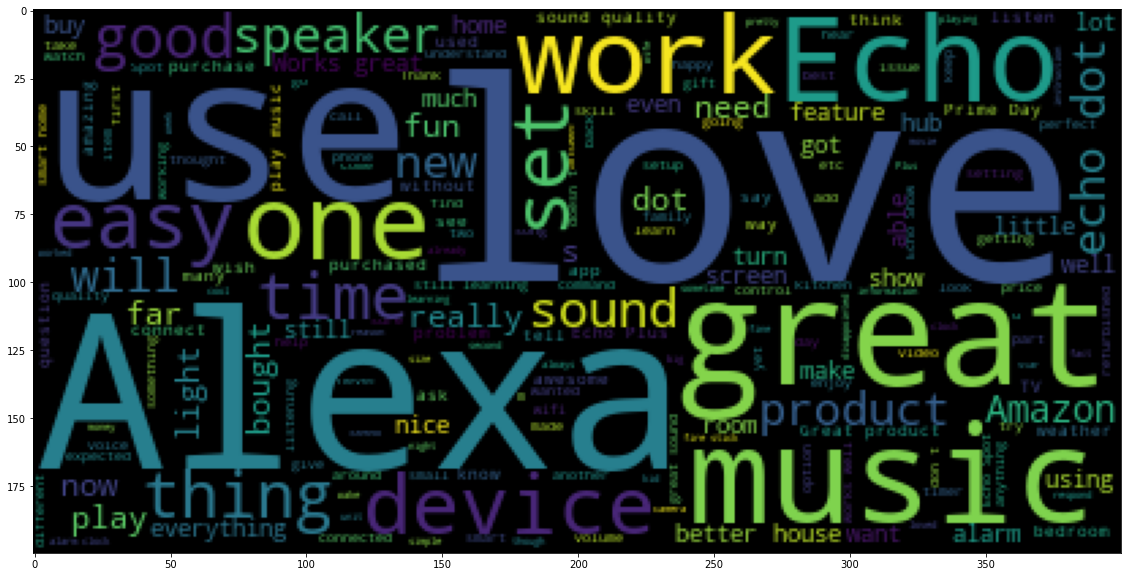

In [13]:
#lifting the column of interest
test_texts = df['verified_reviews']

#Putting the sentences in a list
test_sentences = test_texts.tolist()

#Joining the sentences to one string
test_sentences_as_one_string =" ".join(test_sentences)

# Visualizing the test string
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(test_sentences_as_one_string))

# **Modelling**

In [14]:

# from sklearn.model_selection import KFold
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [15]:
df.columns

Index(['variation', 'verified_reviews', 'feedback'], dtype='object')

In [16]:

#We now need to label encode our categorical columns
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column .
df['variation']= label_encoder.fit_transform(df['variation'])
df['verified_reviews']= label_encoder.fit_transform(df['verified_reviews'])
df.head(2)

,variation,verified_reviews,feedback
0,5,1313,1
1,5,1403,1


In [19]:

#First we separate our target variable from our predictor variables
y = df['feedback'].values

test_features = ['variation', 'verified_reviews']

X = df[test_features].values

In [20]:
# Splitting dataset to train and test sets 80% train and 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [21]:
#Fitting the model


forest = RandomForestClassifier(n_estimators = 100, random_state=0, min_samples_split = 20, max_depth=5)
forest.fit(X_train, y_train)

# predicting
y_pred = forest.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9079365079365079


In [22]:

# And now we assess the errors
from sklearn.metrics import classification_report
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Report : ",
    classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.91      0.99      0.95       576

    accuracy                           0.91       630
   macro avg       0.46      0.50      0.48       630
weighted avg       0.84      0.91      0.87       630



Without much parameter tuning out model is able to give us a accuracy of 91%

In [24]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_estimators': np.arange(50, 500, 50),
              'min_samples_split': np.arange(5, 30, 5),
              'max_depth': np.arange(2,7)}
rforest = RandomForestClassifier(random_state=0)
#finding values
search = GridSearchCV(estimator=rforest,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train,y_train)
print(search.best_params_)

{'max_depth': 4, 'min_samples_split': 15, 'n_estimators': 100}


In [25]:
#Fitting the model

forest = RandomForestClassifier(n_estimators = 100, random_state=0, min_samples_split = 15, max_depth=4)
forest.fit(X_train, y_train)

# predicting
y_pred = forest.predict(X_test)




# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9095238095238095


In [26]:
# And now we assess the errors
from sklearn.metrics import classification_report
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Report : ",
    classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.91      0.99      0.95       576

    accuracy                           0.91       630
   macro avg       0.46      0.50      0.48       630
weighted avg       0.84      0.91      0.87       630

